# Prevendo a rotatividade de clientes de uma empresa de Telecom
### Projeto nº4 da Formação Cientista de Dados da Data Science Academy
O objetivo é trabalho é criar um modelo de aprendizagem de máquina que possa prever se um cliente pode ou não cancelar seu plano e qual a probabilidade de isso ocorrer.

Para isto, são fornecidos um dataset de treinamento e também um dataset de teste para mensuração final do resultado do modelo.

Será utilizada a a métrica do R^2 para avaliação dos modelos de machine learning criados.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

### Análise Exploratória de Dados

In [2]:
df = pd.read_csv('data/projeto4_telecom_treino.csv')
df

,Unnamed: 0,state,account_length,area_code,international_plan,voice_mail_plan,number_vmail_messages,total_day_minutes,total_day_calls,total_day_charge,...,total_eve_calls,total_eve_charge,total_night_minutes,total_night_calls,total_night_charge,total_intl_minutes,total_intl_calls,total_intl_charge,number_customer_service_calls,churn
0,1,KS,128,area_code_415,no,yes,25,265.1,110,45.07,...,99,16.78,244.7,91,11.01,10.0,3,2.70,1,no
1,2,OH,107,area_code_415,no,yes,26,161.6,123,27.47,...,103,16.62,254.4,103,11.45,13.7,3,3.70,1,no
2,3,NJ,137,area_code_415,no,no,0,243.4,114,41.38,...,110,10.30,162.6,104,7.32,12.2,5,3.29,0,no
3,4,OH,84,area_code_408,yes,no,0,299.4,71,50.90,...,88,5.26,196.9,89,8.86,6.6,7,1.78,2,no
4,5,OK,75,area_code_415,yes,no,0,166.7,113,28.34,...,122,12.61,186.9,121,8.41,10.1,3,2.73,3,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3328,3329,AZ,192,area_code_415,no,yes,36,156.2,77,26.55,...,126,18.32,279.1,83,12.56,9.9,6,2.67,2,no
3329,3330,WV,68,area_code_415,no,no,0,231.1,57,39.29,...,55,13.04,191.3,123,8.61,9.6,4,2.59,3,no
3330,3331,RI,28,area_code_510,no,no,0,180.8,109,30.74,...,58,24.55,191.9,91,8.64,14.1,6,3.81,2,no
3331,3332,CT,184,area_code_510,yes,no,0,213.8,105,36.35,...,84,13.57,139.2,137,6.26,5.0,10,1.35,2,no


In [3]:
df.describe()

,Unnamed: 0,account_length,number_vmail_messages,total_day_minutes,total_day_calls,total_day_charge,total_eve_minutes,total_eve_calls,total_eve_charge,total_night_minutes,total_night_calls,total_night_charge,total_intl_minutes,total_intl_calls,total_intl_charge,number_customer_service_calls
count,3333.00000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000
mean,1667.00000,101.064806,8.099010,179.775098,100.435644,30.562307,200.980348,100.114311,17.083540,200.872037,100.107711,9.039325,10.237294,4.479448,2.764581,1.562856
std,962.29855,39.822106,13.688365,54.467389,20.069084,9.259435,50.713844,19.922625,4.310668,50.573847,19.568609,2.275873,2.791840,2.461214,0.753773,1.315491
min,1.00000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,23.200000,33.000000,1.040000,0.000000,0.000000,0.000000,0.000000
25%,834.00000,74.000000,0.000000,143.700000,87.000000,24.430000,166.600000,87.000000,14.160000,167.000000,87.000000,7.520000,8.500000,3.000000,2.300000,1.000000
50%,1667.00000,101.000000,0.000000,179.400000,101.000000,30.500000,201.400000,100.000000,17.120000,201.200000,100.000000,9.050000,10.300000,4.000000,2.780000,1.000000
75%,2500.00000,127.000000,20.000000,216.400000,114.000000,36.790000,235.300000,114.000000,20.000000,235.300000,113.000000,10.590000,12.100000,6.000000,3.270000,2.000000
max,3333.00000,243.000000,51.000000,350.800000,165.000000,59.640000,363.700000,170.000000,30.910000,395.000000,175.000000,17.770000,20.000000,20.000000,5.400000,9.000000


In [4]:
df.isna().sum()

Unnamed: 0                       0
state                            0
account_length                   0
area_code                        0
international_plan               0
voice_mail_plan                  0
number_vmail_messages            0
total_day_minutes                0
total_day_calls                  0
total_day_charge                 0
total_eve_minutes                0
total_eve_calls                  0
total_eve_charge                 0
total_night_minutes              0
total_night_calls                0
total_night_charge               0
total_intl_minutes               0
total_intl_calls                 0
total_intl_charge                0
number_customer_service_calls    0
churn                            0
dtype: int64

Não há dados faltantes no dataset a serem tratados.

In [5]:
df.dtypes

Unnamed: 0                         int64
state                             object
account_length                     int64
area_code                         object
international_plan                object
voice_mail_plan                   object
number_vmail_messages              int64
total_day_minutes                float64
total_day_calls                    int64
total_day_charge                 float64
total_eve_minutes                float64
total_eve_calls                    int64
total_eve_charge                 float64
total_night_minutes              float64
total_night_calls                  int64
total_night_charge               float64
total_intl_minutes               float64
total_intl_calls                   int64
total_intl_charge                float64
number_customer_service_calls      int64
churn                             object
dtype: object

In [6]:
df.dtypes[df.dtypes.values=='object']

state                 object
area_code             object
international_plan    object
voice_mail_plan       object
churn                 object
dtype: object

In [7]:
df.dtypes[df.dtypes.values!='object']

Unnamed: 0                         int64
account_length                     int64
number_vmail_messages              int64
total_day_minutes                float64
total_day_calls                    int64
total_day_charge                 float64
total_eve_minutes                float64
total_eve_calls                    int64
total_eve_charge                 float64
total_night_minutes              float64
total_night_calls                  int64
total_night_charge               float64
total_intl_minutes               float64
total_intl_calls                   int64
total_intl_charge                float64
number_customer_service_calls      int64
dtype: object

O *dataset* é constituído por 15 variáveis numéricas e 5 variáveis categóricas. Uma das variáveis é o índice, que deve ser desconsiderado na análise por não acrescentar informação sobre o cliente.

In [8]:
df.set_index('Unnamed: 0', inplace=True)
df

,state,account_length,area_code,international_plan,voice_mail_plan,number_vmail_messages,total_day_minutes,total_day_calls,total_day_charge,total_eve_minutes,total_eve_calls,total_eve_charge,total_night_minutes,total_night_calls,total_night_charge,total_intl_minutes,total_intl_calls,total_intl_charge,number_customer_service_calls,churn
Unnamed: 0,,,,,,,,,,,,,,,,,,,,
1,KS,128,area_code_415,no,yes,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.70,1,no
2,OH,107,area_code_415,no,yes,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1,no
3,NJ,137,area_code_415,no,no,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0,no
4,OH,84,area_code_408,yes,no,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2,no
5,OK,75,area_code_415,yes,no,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3329,AZ,192,area_code_415,no,yes,36,156.2,77,26.55,215.5,126,18.32,279.1,83,12.56,9.9,6,2.67,2,no
3330,WV,68,area_code_415,no,no,0,231.1,57,39.29,153.4,55,13.04,191.3,123,8.61,9.6,4,2.59,3,no
3331,RI,28,area_code_510,no,no,0,180.8,109,30.74,288.8,58,24.55,191.9,91,8.64,14.1,6,3.81,2,no


In [9]:
numericas = df[df.dtypes[df.dtypes.values!='object'].index]
numericas

,account_length,number_vmail_messages,total_day_minutes,total_day_calls,total_day_charge,total_eve_minutes,total_eve_calls,total_eve_charge,total_night_minutes,total_night_calls,total_night_charge,total_intl_minutes,total_intl_calls,total_intl_charge,number_customer_service_calls
Unnamed: 0,,,,,,,,,,,,,,,
1,128,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.70,1
2,107,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1
3,137,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0
4,84,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2
5,75,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3329,192,36,156.2,77,26.55,215.5,126,18.32,279.1,83,12.56,9.9,6,2.67,2
3330,68,0,231.1,57,39.29,153.4,55,13.04,191.3,123,8.61,9.6,4,2.59,3
3331,28,0,180.8,109,30.74,288.8,58,24.55,191.9,91,8.64,14.1,6,3.81,2


In [10]:
categoricas = df[df.dtypes[df.dtypes.values=='object'].index]
categoricas

,state,area_code,international_plan,voice_mail_plan,churn
Unnamed: 0,,,,,
1,KS,area_code_415,no,yes,no
2,OH,area_code_415,no,yes,no
3,NJ,area_code_415,no,no,no
4,OH,area_code_408,yes,no,no
5,OK,area_code_415,yes,no,no
...,...,...,...,...,...
3329,AZ,area_code_415,no,yes,no
3330,WV,area_code_415,no,no,no
3331,RI,area_code_510,no,no,no


In [11]:
# Verificando quantos valores únicos há em cada coluna do dataset de variáveis categóricas
n_unicos = pd.DataFrame(columns=['N_unicos'])
for col in categoricas.columns:
    n_unicos.loc[col] = len(df[col].unique())

In [12]:
n_unicos

,N_unicos
state,51
area_code,3
international_plan,2
voice_mail_plan,2
churn,2


Verificando agora a distribuição destas variáveis categóricas entre os *labels* 0 e 1 do *churn*. A intenção é constatar graficamente se as mesmas são significativas para a rotatividade de clientes.

In [13]:
n_unicos.index

Index(['state', 'area_code', 'international_plan', 'voice_mail_plan', 'churn'], dtype='object')

In [14]:
tabela = df[['area_code', 'churn', 'account_length']]
tabela

,area_code,churn,account_length
Unnamed: 0,,,
1,area_code_415,no,128
2,area_code_415,no,107
3,area_code_415,no,137
4,area_code_408,no,84
5,area_code_415,no,75
...,...,...,...
3329,area_code_415,no,192
3330,area_code_415,no,68
3331,area_code_510,no,28


In [15]:
agregado = tabela.pivot_table(index='area_code', columns='churn', values='account_length', aggfunc='count')
agregado

churn,no,yes
area_code,,
area_code_408,716,122
area_code_415,1419,236
area_code_510,715,125


In [16]:
df['state']

Unnamed: 0
1       KS
2       OH
3       NJ
4       OH
5       OK
        ..
3329    AZ
3330    WV
3331    RI
3332    CT
3333    TN
Name: state, Length: 3333, dtype: object

In [17]:
labels = df['state'].unique()
labels

array(['KS', 'OH', 'NJ', 'OK', 'AL', 'MA', 'MO', 'LA', 'WV', 'IN', 'RI',
       'IA', 'MT', 'NY', 'ID', 'VT', 'VA', 'TX', 'FL', 'CO', 'AZ', 'SC',
       'NE', 'WY', 'HI', 'IL', 'NH', 'GA', 'AK', 'MD', 'AR', 'WI', 'OR',
       'MI', 'DE', 'UT', 'CA', 'MN', 'SD', 'NC', 'WA', 'NM', 'NV', 'DC',
       'KY', 'ME', 'MS', 'TN', 'PA', 'CT', 'ND'], dtype=object)

In [18]:
x = np.arange(len(labels)) # locais dos labels no gráfico
width = 0.35 # largura das barras

In [19]:
agregado['total'] = agregado.yes + agregado.no

In [20]:
agregado['perc_yes'] = agregado.yes/agregado.total
agregado['perc_no'] = agregado.no/agregado.total

In [21]:
agregado

churn,no,yes,total,perc_yes,perc_no
area_code,,,,,
area_code_408,716,122,838,0.145585,0.854415
area_code_415,1419,236,1655,0.142598,0.857402
area_code_510,715,125,840,0.148810,0.851190


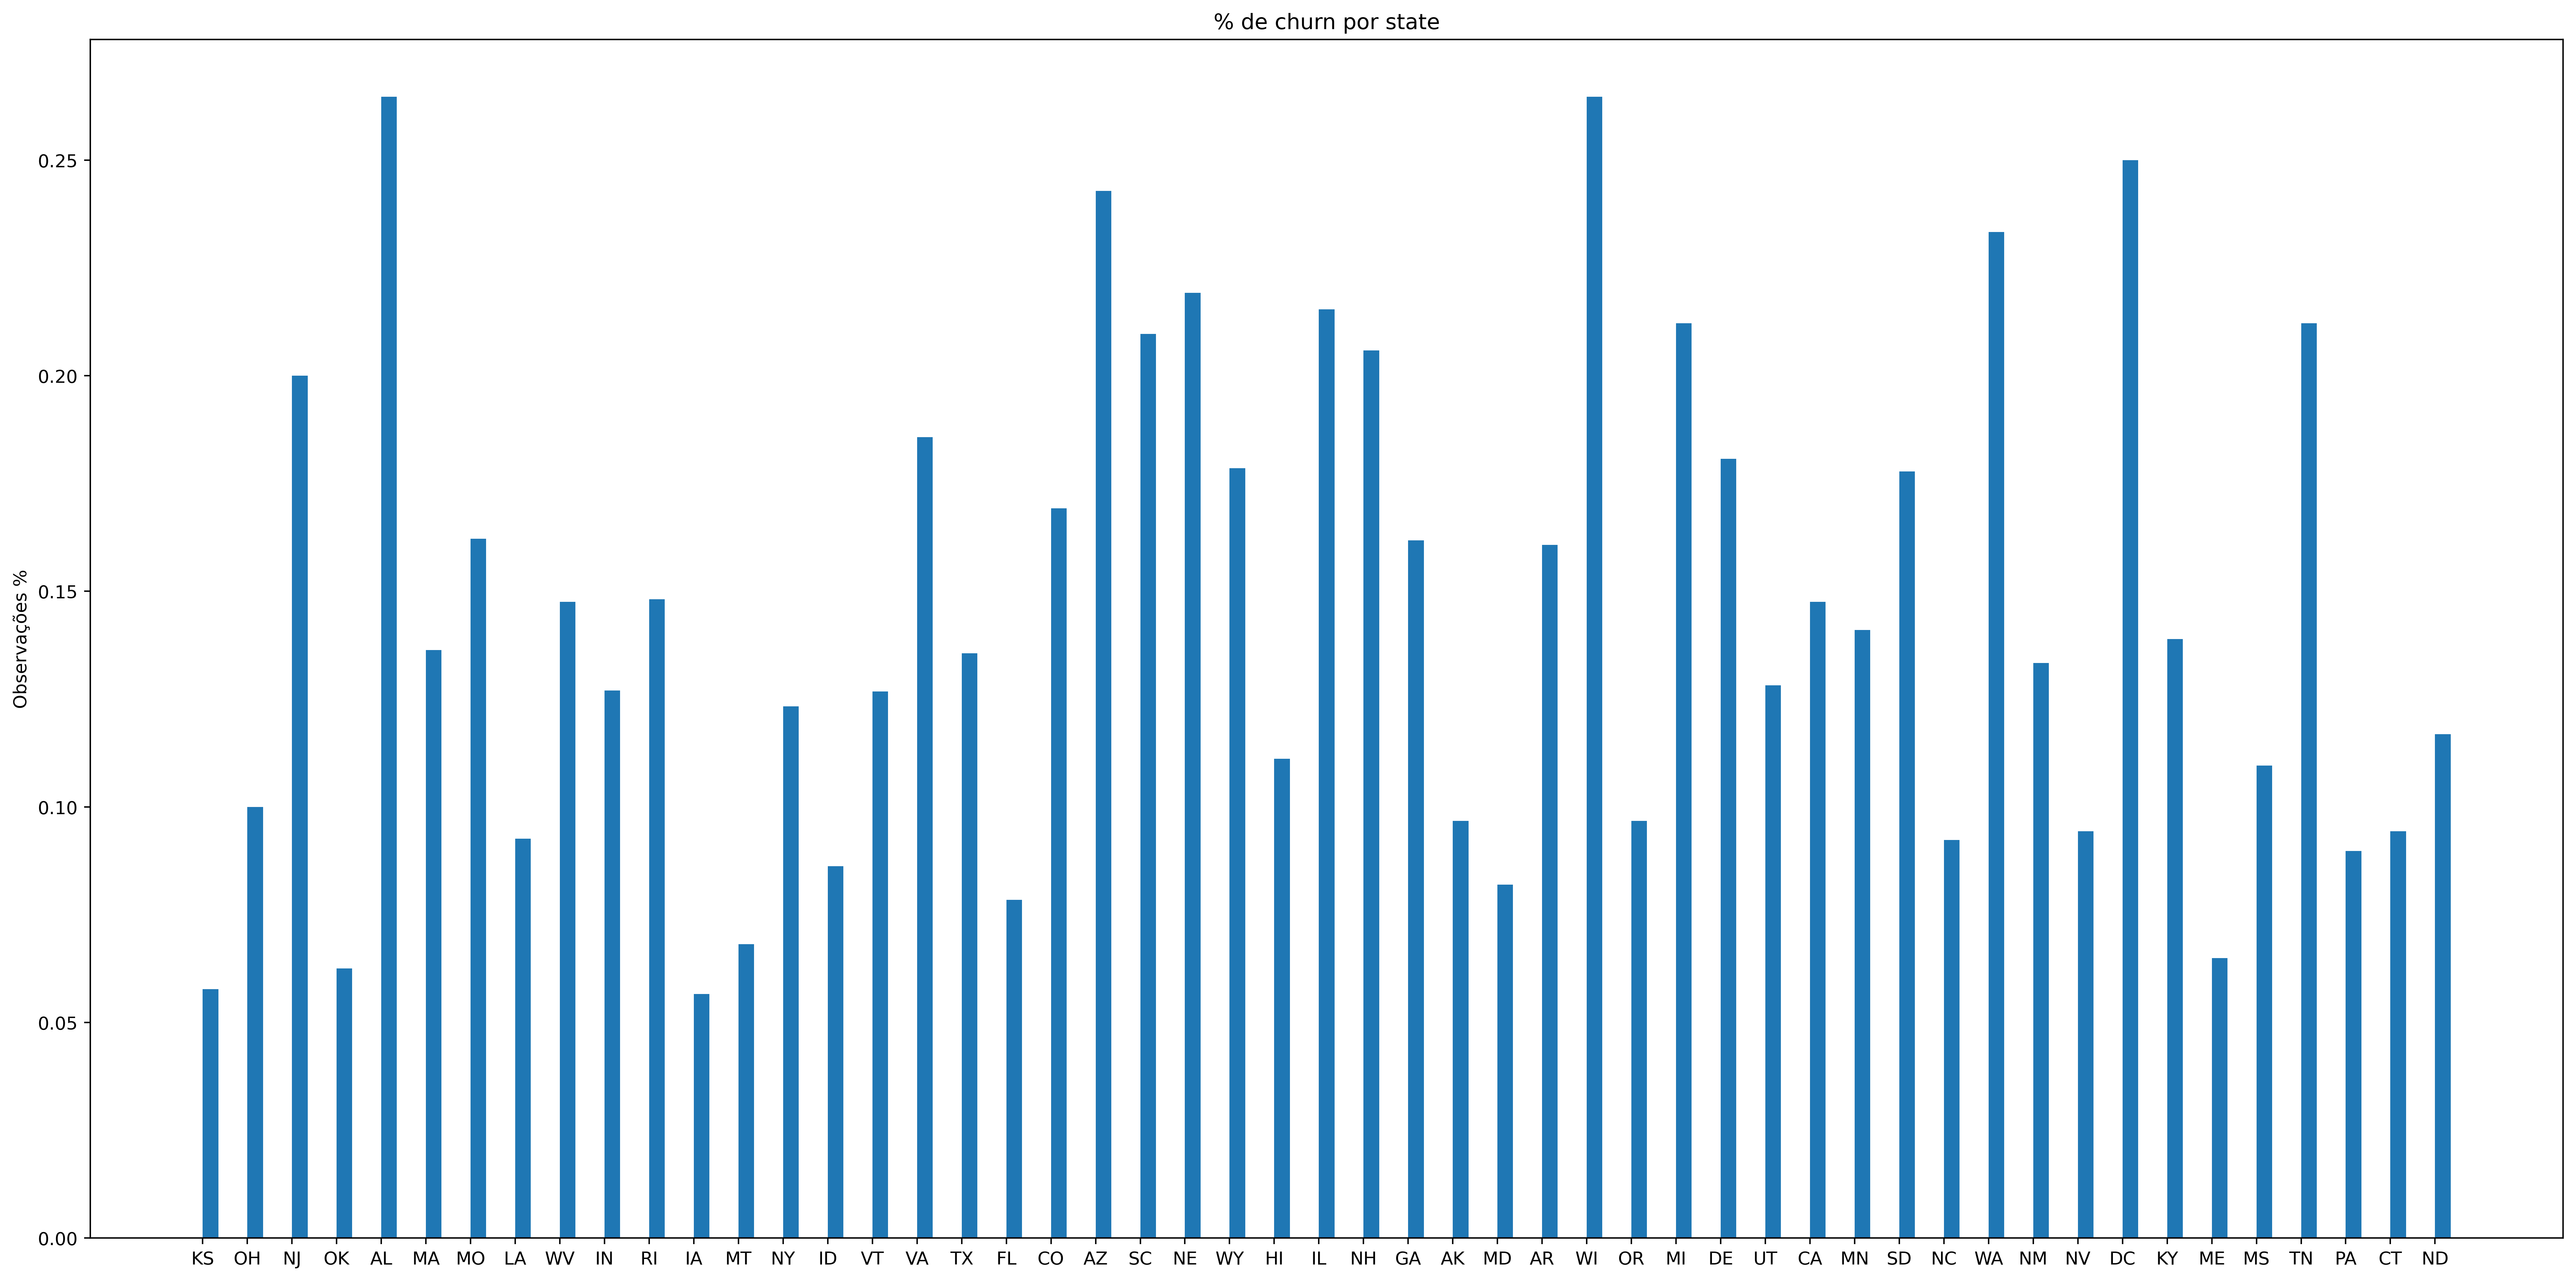

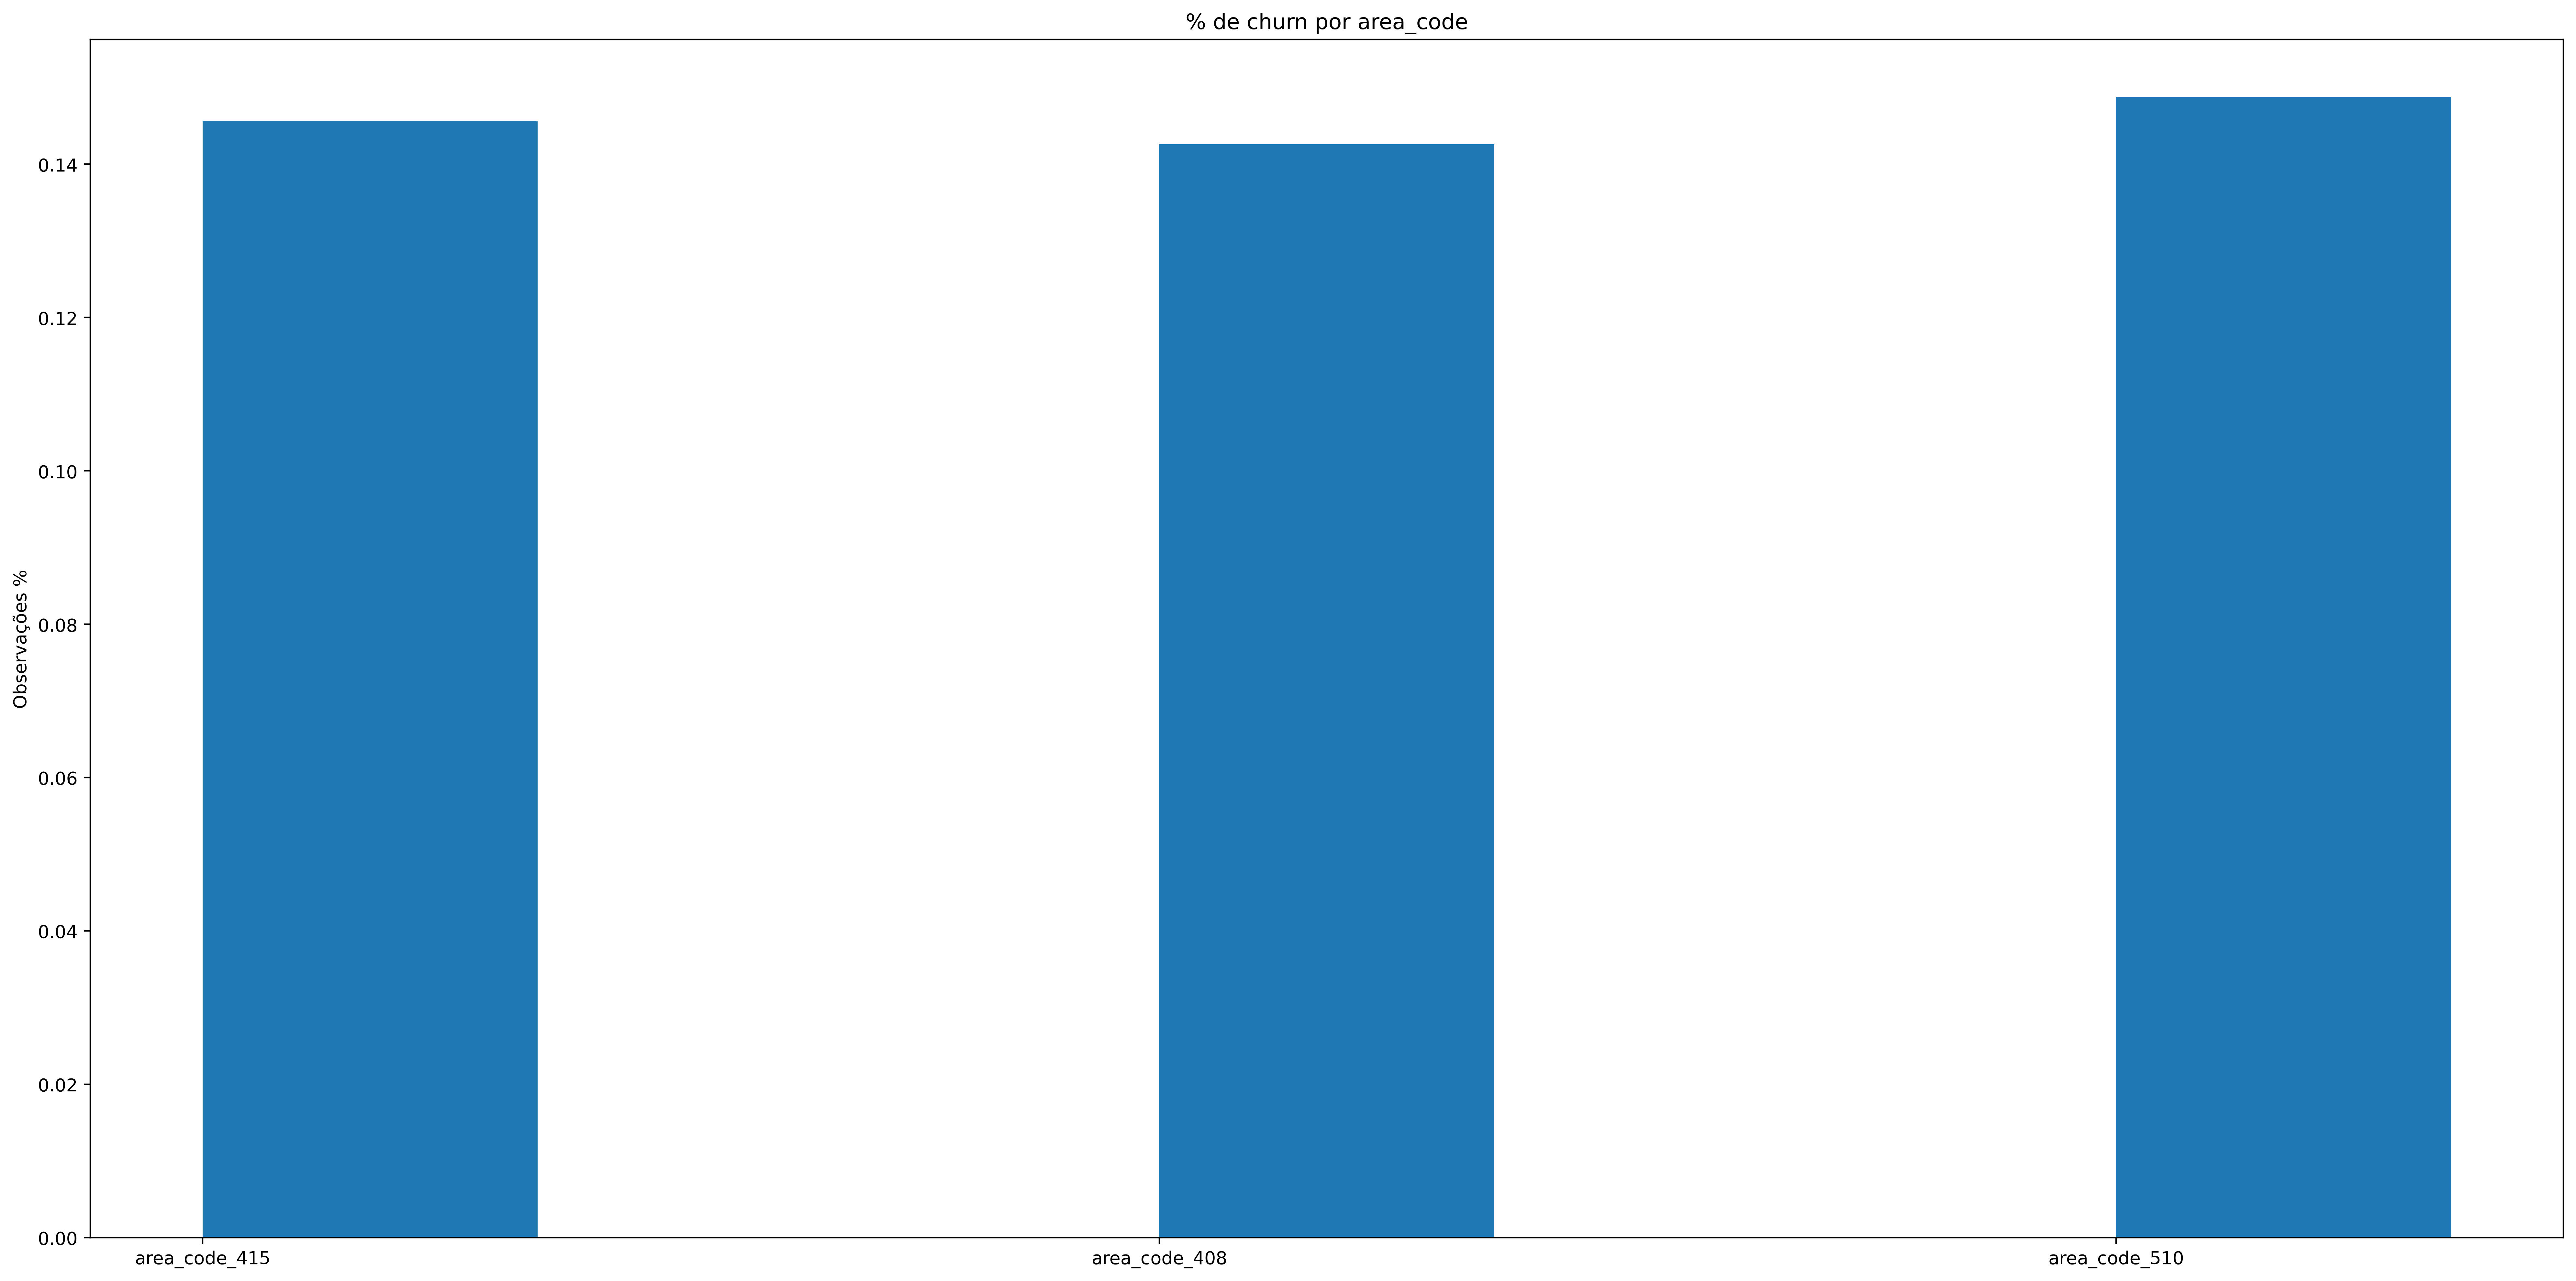

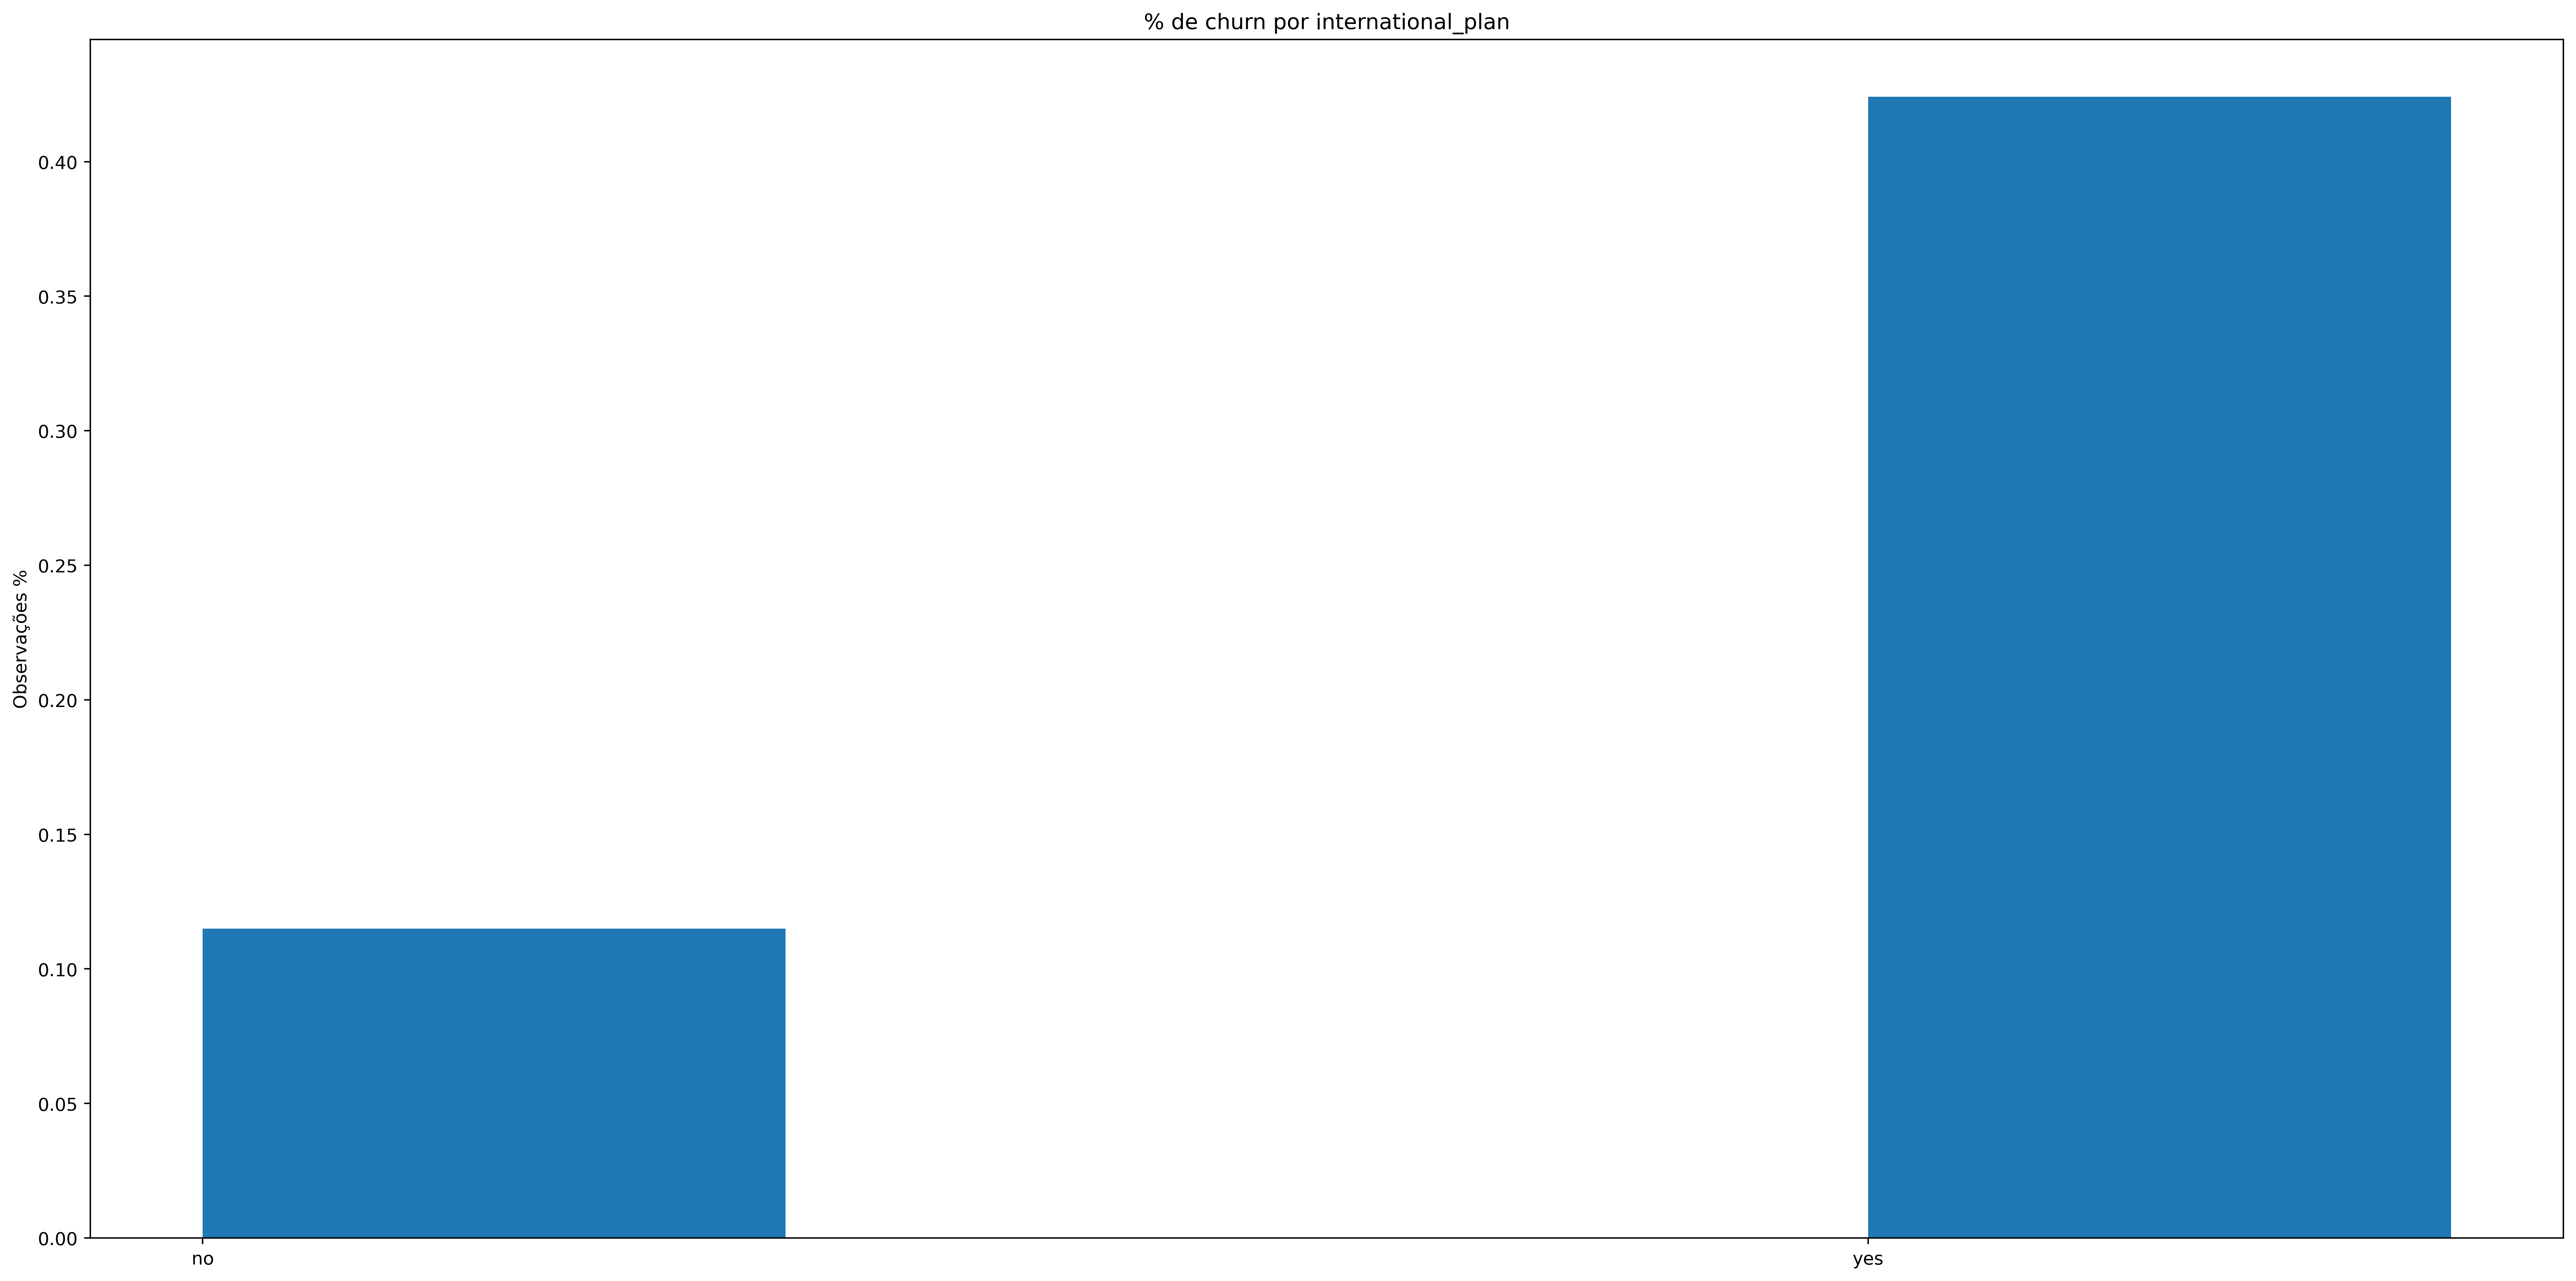

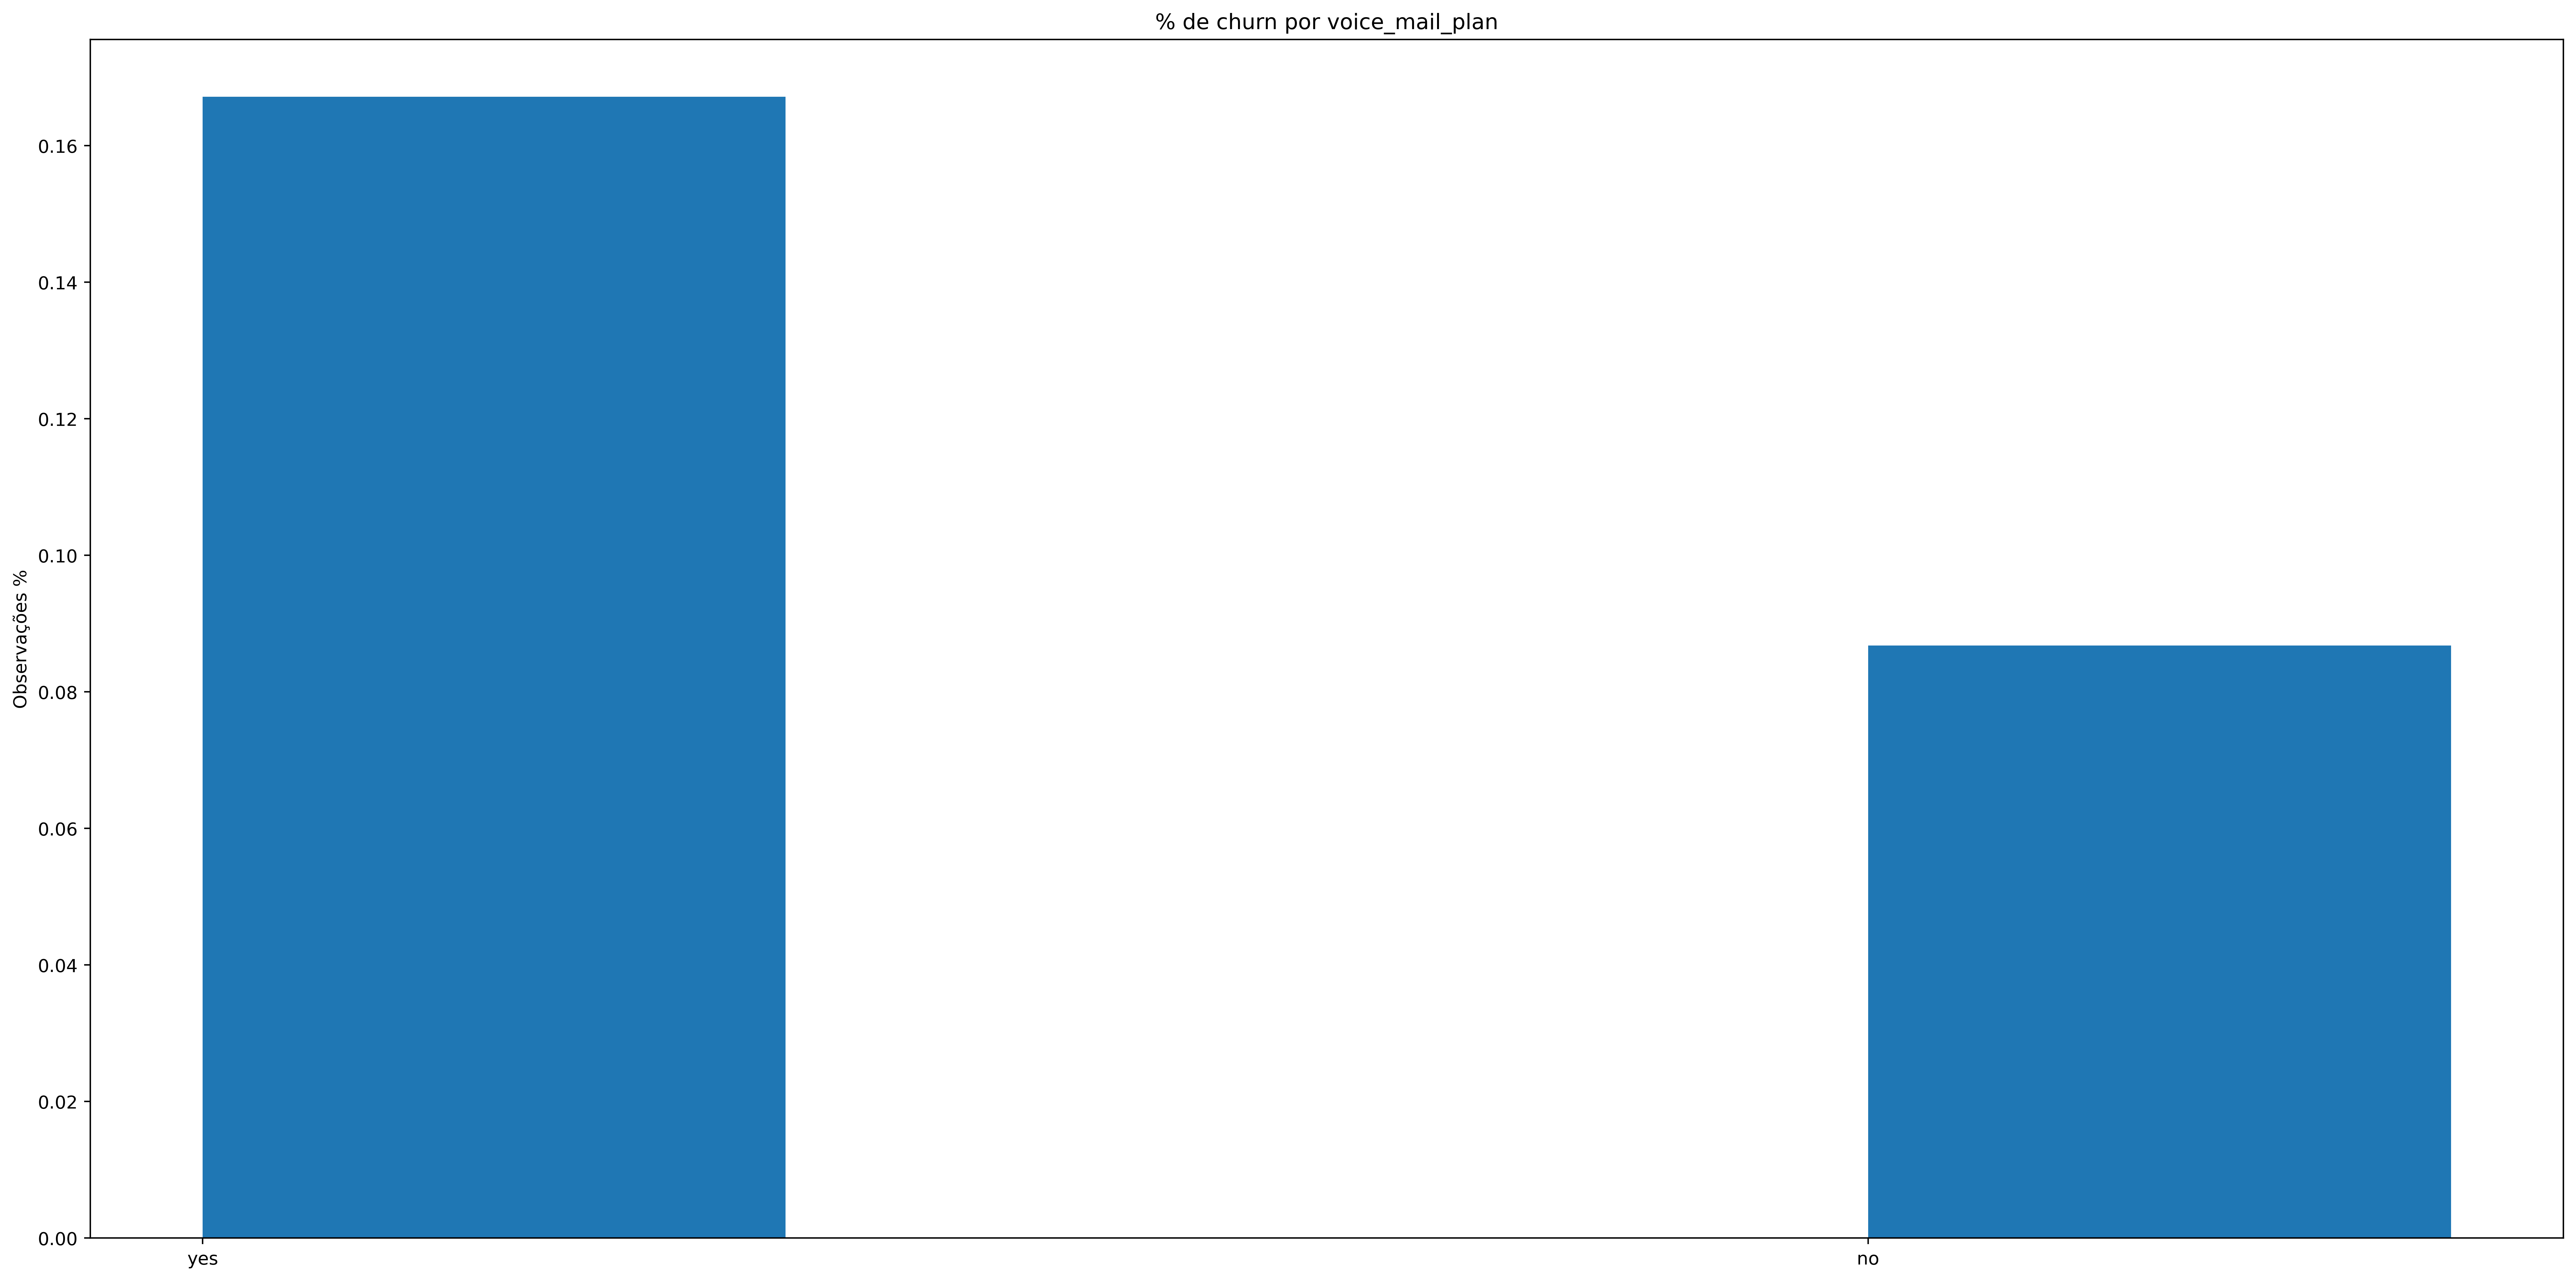

In [22]:
for var in n_unicos.index[:-1]:
    labels = df[var].unique()
    x = np.arange(len(labels)) # locais dos labels no gráfico
    width = 0.35 # largura das barras
    
    tabela = df[[var, 'churn', 'account_length']].set_index(var)
    agregado = tabela.pivot_table(index=var, columns='churn', values='account_length', aggfunc='count')
    agregado['total'] = agregado.yes + agregado.no
    agregado['perc_yes'] = agregado.yes/agregado.total
    agregado['perc_no'] = agregado.no/agregado.total
    
    fig, ax = plt.subplots(figsize=(20, 10), dpi=400)
    #rects1 = ax.bar(x - width/2, agregado['perc_no'], width, label='No')
    rects2 = ax.bar(x + width/2, agregado['perc_yes'], width, label='Yes')

    # Add some text for labels, title and custom x-axis tick labels, etc.
    ax.set_ylabel('Observações %')
    ax.set_title(f'% de churn por {var}')
    ax.set_xticks(x)
    ax.set_xticklabels(labels)
    #ax.legend()
    
    #def autolabel(rects):
    # Attach a text label above each bar in *rects*, displaying its height."""
    #    for rect in rects:
    #        height = rect.get_height()
    #        ax.annotate('{}'.format(height),
    #                    xy=(rect.get_x() + rect.get_width() / 2, height),
    #                    xytext=(0, 3),  # 3 points vertical offset
    #                    textcoords="offset points",
    #                    ha='center', va='bottom')


    #autolabel(rects1)
    #autolabel(rects2)

    fig.tight_layout()

    plt.show()

Analisando graficamente, apenas o atributo area_code_408 não tem uma correlação visual notável com a variável de saída. Isto não significa, contudo, que a variável não contenha informações relevantes para treinamento do modelo de machine learning. Para fins de treinamento do primeiro modelo, esta variável será excluída e, caso não se chegue a um resultado satisfatório, pode ser adicionada posteriormente aos dados de entrada.

Verificadas as influências das variáveis categóricas sobre a saída, passa-se agora a verificar as correlações das variáveis numéricas com a saída.

In [23]:
numericas['label'] = categoricas.loc[:,'churn']
numericas

<ipython-input-23-39362ee8899b>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  numericas['label'] = categoricas.loc[:,'churn']


,account_length,number_vmail_messages,total_day_minutes,total_day_calls,total_day_charge,total_eve_minutes,total_eve_calls,total_eve_charge,total_night_minutes,total_night_calls,total_night_charge,total_intl_minutes,total_intl_calls,total_intl_charge,number_customer_service_calls,label
Unnamed: 0,,,,,,,,,,,,,,,,
1,128,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.70,1,no
2,107,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1,no
3,137,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0,no
4,84,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2,no
5,75,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3329,192,36,156.2,77,26.55,215.5,126,18.32,279.1,83,12.56,9.9,6,2.67,2,no
3330,68,0,231.1,57,39.29,153.4,55,13.04,191.3,123,8.61,9.6,4,2.59,3,no
3331,28,0,180.8,109,30.74,288.8,58,24.55,191.9,91,8.64,14.1,6,3.81,2,no


In [24]:
import seaborn as sns

In [25]:
numericas.columns[:-1]

Index(['account_length', 'number_vmail_messages', 'total_day_minutes',
       'total_day_calls', 'total_day_charge', 'total_eve_minutes',
       'total_eve_calls', 'total_eve_charge', 'total_night_minutes',
       'total_night_calls', 'total_night_charge', 'total_intl_minutes',
       'total_intl_calls', 'total_intl_charge',
       'number_customer_service_calls'],
      dtype='object')

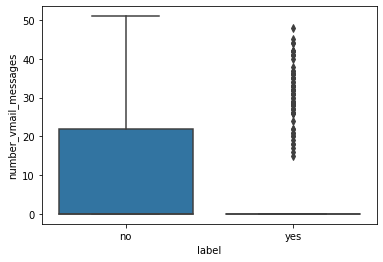

In [26]:
box = sns.boxplot(x=numericas.label, y=numericas.number_vmail_messages)

In [27]:
def plota_box_plot(var):
    box = sns.boxplot(x=numericas.label, y=numericas[var])
    return box

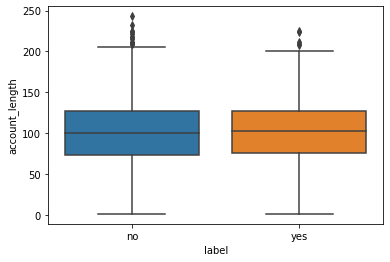

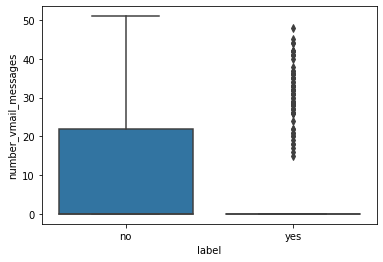

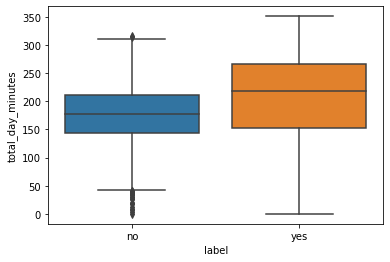

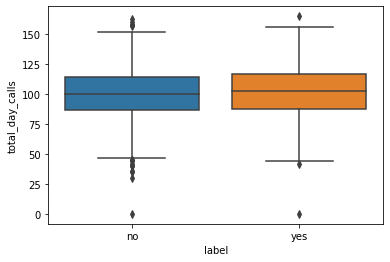

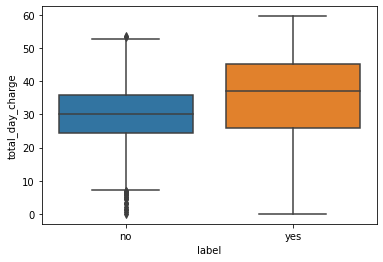

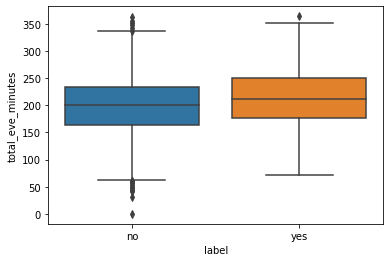

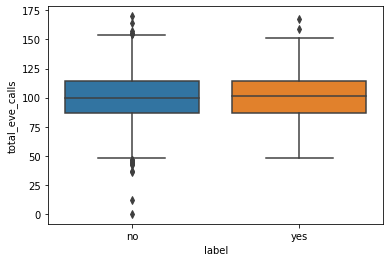

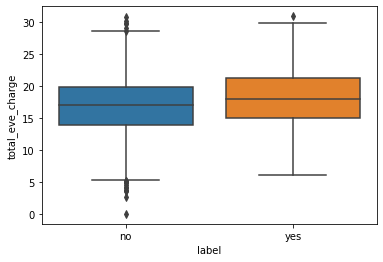

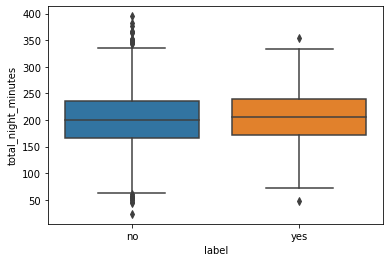

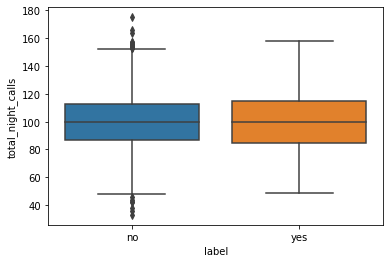

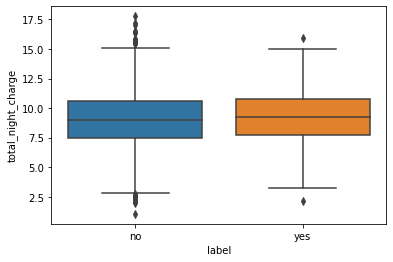

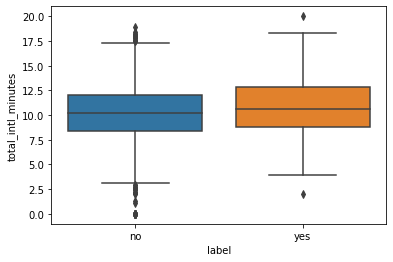

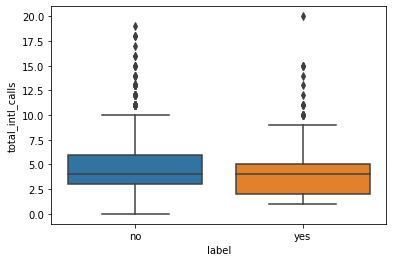

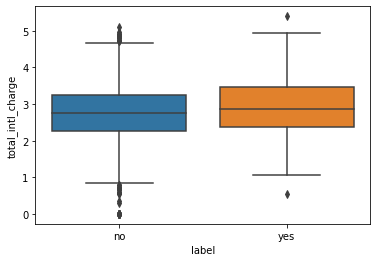

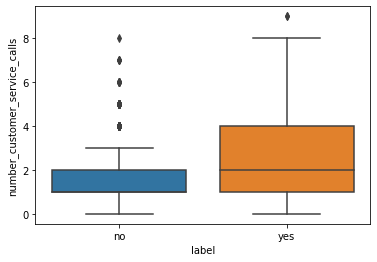

In [28]:
for var in numericas.columns[:-1]:
    plt.figure()
    box = sns.boxplot(x=numericas.label, y=numericas[var])

In [29]:
numericas.label = numericas.label.replace(to_replace='yes', value=1)
numericas.label = numericas.label.replace(to_replace='no', value=-1)
numericas

/home/rafael/anaconda3/lib/python3.8/site-packages/pandas/core/generic.py:5168: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value


,account_length,number_vmail_messages,total_day_minutes,total_day_calls,total_day_charge,total_eve_minutes,total_eve_calls,total_eve_charge,total_night_minutes,total_night_calls,total_night_charge,total_intl_minutes,total_intl_calls,total_intl_charge,number_customer_service_calls,label
Unnamed: 0,,,,,,,,,,,,,,,,
1,128,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.70,1,-1
2,107,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1,-1
3,137,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0,-1
4,84,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2,-1
5,75,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3,-1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3329,192,36,156.2,77,26.55,215.5,126,18.32,279.1,83,12.56,9.9,6,2.67,2,-1
3330,68,0,231.1,57,39.29,153.4,55,13.04,191.3,123,8.61,9.6,4,2.59,3,-1
3331,28,0,180.8,109,30.74,288.8,58,24.55,191.9,91,8.64,14.1,6,3.81,2,-1


In [30]:
numericas.dtypes

account_length                     int64
number_vmail_messages              int64
total_day_minutes                float64
total_day_calls                    int64
total_day_charge                 float64
total_eve_minutes                float64
total_eve_calls                    int64
total_eve_charge                 float64
total_night_minutes              float64
total_night_calls                  int64
total_night_charge               float64
total_intl_minutes               float64
total_intl_calls                   int64
total_intl_charge                float64
number_customer_service_calls      int64
label                              int64
dtype: object

In [31]:
correlacoes = pd.DataFrame.corr(numericas)

In [32]:
correlacoes

,account_length,number_vmail_messages,total_day_minutes,total_day_calls,total_day_charge,total_eve_minutes,total_eve_calls,total_eve_charge,total_night_minutes,total_night_calls,total_night_charge,total_intl_minutes,total_intl_calls,total_intl_charge,number_customer_service_calls,label
account_length,1.000000,-0.004628,0.006216,0.038470,0.006214,-0.006757,0.019260,-0.006745,-0.008955,-0.013176,-0.008960,0.009514,0.020661,0.009546,-0.003796,0.016541
number_vmail_messages,-0.004628,1.000000,0.000778,-0.009548,0.000776,0.017562,-0.005864,0.017578,0.007681,0.007123,0.007663,0.002856,0.013957,0.002884,-0.013263,-0.089728
total_day_minutes,0.006216,0.000778,1.000000,0.006750,1.000000,0.007043,0.015769,0.007029,0.004323,0.022972,0.004300,-0.010155,0.008033,-0.010092,-0.013423,0.205151
total_day_calls,0.038470,-0.009548,0.006750,1.000000,0.006753,-0.021451,0.006462,-0.021449,0.022938,-0.019557,0.022927,0.021565,0.004574,0.021666,-0.018942,0.018459
total_day_charge,0.006214,0.000776,1.000000,0.006753,1.000000,0.007050,0.015769,0.007036,0.004324,0.022972,0.004301,-0.010157,0.008032,-0.010094,-0.013427,0.205151
total_eve_minutes,-0.006757,0.017562,0.007043,-0.021451,0.007050,1.000000,-0.011430,1.000000,-0.012584,0.007586,-0.012593,-0.011035,0.002541,-0.011067,-0.012985,0.092796
total_eve_calls,0.019260,-0.005864,0.015769,0.006462,0.015769,-0.011430,1.000000,-0.011423,-0.002093,0.007710,-0.002056,0.008703,0.017434,0.008674,0.002423,0.009233
total_eve_charge,-0.006745,0.017578,0.007029,-0.021449,0.007036,1.000000,-0.011423,1.000000,-0.012592,0.007596,-0.012601,-0.011043,0.002541,-0.011074,-0.012987,0.092786
total_night_minutes,-0.008955,0.007681,0.004323,0.022938,0.004324,-0.012584,-0.002093,-0.012592,1.000000,0.011204,0.999999,-0.015207,-0.012353,-0.015180,-0.009288,0.035493
total_night_calls,-0.013176,0.007123,0.022972,-0.019557,0.022972,0.007586,0.007710,0.007596,0.011204,1.000000,0.011188,-0.013605,0.000305,-0.013630,-0.012802,0.006141


<AxesSubplot:>

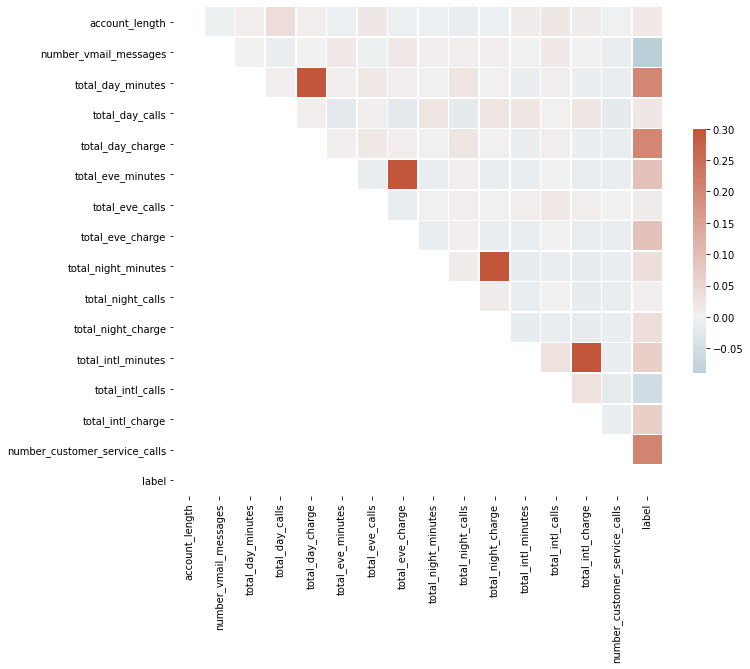

In [33]:
# Generate a mask for the upper triangle
mask = np.tril(np.ones_like(correlacoes, dtype=bool))

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(230, 20, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(correlacoes, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

Para previsão e estimativa da probabilidade, será utilizado o algoritmo de regressão logístisca, conforme recomendado nas instruções do projeto. Para efeitos de comparação da importância da etapa de *feature selection* neste caso específico, o modelo será alimentado com duas versões do conjunto de dados de entrada: a primeira com o *dataset* completo de treinamento e a segunda com este mesmo *dataset* retiradas as variáveis *area_code, account_length, total_day_calls, total_eve_calls e total_night_calls* por baixa correlação com a saída, e também as variáveis *total_day_charge, total_eve_charge, total_night_charge e total_intl_charge* por não serem linearmente independentes em relação a outras variáveis do mesmo *dataset*, conforme sugere o gráfico de correlações. 

In [34]:
# Dataframe completo
df = pd.read_csv('data/projeto4_telecom_treino.csv')
df

,Unnamed: 0,state,account_length,area_code,international_plan,voice_mail_plan,number_vmail_messages,total_day_minutes,total_day_calls,total_day_charge,...,total_eve_calls,total_eve_charge,total_night_minutes,total_night_calls,total_night_charge,total_intl_minutes,total_intl_calls,total_intl_charge,number_customer_service_calls,churn
0,1,KS,128,area_code_415,no,yes,25,265.1,110,45.07,...,99,16.78,244.7,91,11.01,10.0,3,2.70,1,no
1,2,OH,107,area_code_415,no,yes,26,161.6,123,27.47,...,103,16.62,254.4,103,11.45,13.7,3,3.70,1,no
2,3,NJ,137,area_code_415,no,no,0,243.4,114,41.38,...,110,10.30,162.6,104,7.32,12.2,5,3.29,0,no
3,4,OH,84,area_code_408,yes,no,0,299.4,71,50.90,...,88,5.26,196.9,89,8.86,6.6,7,1.78,2,no
4,5,OK,75,area_code_415,yes,no,0,166.7,113,28.34,...,122,12.61,186.9,121,8.41,10.1,3,2.73,3,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3328,3329,AZ,192,area_code_415,no,yes,36,156.2,77,26.55,...,126,18.32,279.1,83,12.56,9.9,6,2.67,2,no
3329,3330,WV,68,area_code_415,no,no,0,231.1,57,39.29,...,55,13.04,191.3,123,8.61,9.6,4,2.59,3,no
3330,3331,RI,28,area_code_510,no,no,0,180.8,109,30.74,...,58,24.55,191.9,91,8.64,14.1,6,3.81,2,no
3331,3332,CT,184,area_code_510,yes,no,0,213.8,105,36.35,...,84,13.57,139.2,137,6.26,5.0,10,1.35,2,no


In [35]:
# Fatorizando as variáveis categóricas para poder inserir no modelo de Regressão Logística:
for col in categoricas.columns:
    df.loc[:, col] = pd.Series(df.loc[:, col].factorize()[0])

In [36]:
df.set_index('Unnamed: 0', inplace=True)
df

,state,account_length,area_code,international_plan,voice_mail_plan,number_vmail_messages,total_day_minutes,total_day_calls,total_day_charge,total_eve_minutes,total_eve_calls,total_eve_charge,total_night_minutes,total_night_calls,total_night_charge,total_intl_minutes,total_intl_calls,total_intl_charge,number_customer_service_calls,churn
Unnamed: 0,,,,,,,,,,,,,,,,,,,,
1,0,128,0,0,0,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.70,1,0
2,1,107,0,0,0,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1,0
3,2,137,0,0,1,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0,0
4,1,84,1,1,1,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2,0
5,3,75,0,1,1,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3329,20,192,0,0,0,36,156.2,77,26.55,215.5,126,18.32,279.1,83,12.56,9.9,6,2.67,2,0
3330,8,68,0,0,1,0,231.1,57,39.29,153.4,55,13.04,191.3,123,8.61,9.6,4,2.59,3,0
3331,10,28,2,0,1,0,180.8,109,30.74,288.8,58,24.55,191.9,91,8.64,14.1,6,3.81,2,0


In [37]:
df.isna().sum()

state                            0
account_length                   0
area_code                        0
international_plan               0
voice_mail_plan                  0
number_vmail_messages            0
total_day_minutes                0
total_day_calls                  0
total_day_charge                 0
total_eve_minutes                0
total_eve_calls                  0
total_eve_charge                 0
total_night_minutes              0
total_night_calls                0
total_night_charge               0
total_intl_minutes               0
total_intl_calls                 0
total_intl_charge                0
number_customer_service_calls    0
churn                            0
dtype: int64

In [38]:
# Dataframe sem os atributos citados
df2 = df.drop(['area_code', 'account_length', 'total_day_calls', 'total_eve_calls', 'total_night_calls', 'total_day_charge', 'total_eve_charge', 'total_night_charge', 'total_intl_charge'], axis=1)
df2

,state,international_plan,voice_mail_plan,number_vmail_messages,total_day_minutes,total_eve_minutes,total_night_minutes,total_intl_minutes,total_intl_calls,number_customer_service_calls,churn
Unnamed: 0,,,,,,,,,,,
1,0,0,0,25,265.1,197.4,244.7,10.0,3,1,0
2,1,0,0,26,161.6,195.5,254.4,13.7,3,1,0
3,2,0,1,0,243.4,121.2,162.6,12.2,5,0,0
4,1,1,1,0,299.4,61.9,196.9,6.6,7,2,0
5,3,1,1,0,166.7,148.3,186.9,10.1,3,3,0
...,...,...,...,...,...,...,...,...,...,...,...
3329,20,0,0,36,156.2,215.5,279.1,9.9,6,2,0
3330,8,0,1,0,231.1,153.4,191.3,9.6,4,3,0
3331,10,0,1,0,180.8,288.8,191.9,14.1,6,2,0


In [39]:
# Carregando o dataset de teste e realizando as mesmas operações que foram feitas no dataset de treino
df_teste = pd.read_csv('./data/projeto4_telecom_teste.csv')

for col in categoricas.columns:
    df_teste.loc[:, col] = pd.Series(df_teste.loc[:, col].factorize()[0])
    
df_teste.set_index('Unnamed: 0', inplace=True)

df_teste

,state,account_length,area_code,international_plan,voice_mail_plan,number_vmail_messages,total_day_minutes,total_day_calls,total_day_charge,total_eve_minutes,total_eve_calls,total_eve_charge,total_night_minutes,total_night_calls,total_night_charge,total_intl_minutes,total_intl_calls,total_intl_charge,number_customer_service_calls,churn
Unnamed: 0,,,,,,,,,,,,,,,,,,,,
1,0,101,0,0,0,0,70.9,123,12.05,211.9,73,18.01,236.0,73,10.62,10.6,3,2.86,3,0
2,1,137,0,0,0,0,223.6,86,38.01,244.8,139,20.81,94.2,81,4.24,9.5,7,2.57,0,0
3,2,103,1,0,1,29,294.7,95,50.10,237.3,105,20.17,300.3,127,13.51,13.7,6,3.70,1,0
4,3,99,2,0,0,0,216.8,123,36.86,126.4,88,10.74,220.6,82,9.93,15.7,2,4.24,1,0
5,4,108,2,0,0,0,197.4,78,33.56,124.0,101,10.54,204.5,107,9.20,7.7,4,2.08,2,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1663,0,50,1,0,1,40,235.7,127,40.07,223.0,126,18.96,297.5,116,13.39,9.9,5,2.67,2,0
1664,30,152,2,0,0,0,184.2,90,31.31,256.8,73,21.83,213.6,113,9.61,14.7,2,3.97,3,1
1665,41,61,2,0,0,0,140.6,89,23.90,172.8,128,14.69,212.4,97,9.56,13.6,4,3.67,1,0


In [40]:
df2_teste = df_teste.drop(['area_code', 'account_length', 'total_day_calls', 'total_eve_calls', 'total_night_calls', 'total_day_charge', 'total_eve_charge', 'total_night_charge', 'total_intl_charge'], axis=1)
df2_teste

,state,international_plan,voice_mail_plan,number_vmail_messages,total_day_minutes,total_eve_minutes,total_night_minutes,total_intl_minutes,total_intl_calls,number_customer_service_calls,churn
Unnamed: 0,,,,,,,,,,,
1,0,0,0,0,70.9,211.9,236.0,10.6,3,3,0
2,1,0,0,0,223.6,244.8,94.2,9.5,7,0,0
3,2,0,1,29,294.7,237.3,300.3,13.7,6,1,0
4,3,0,0,0,216.8,126.4,220.6,15.7,2,1,0
5,4,0,0,0,197.4,124.0,204.5,7.7,4,2,0
...,...,...,...,...,...,...,...,...,...,...,...
1663,0,0,1,40,235.7,223.0,297.5,9.9,5,2,0
1664,30,0,0,0,184.2,256.8,213.6,14.7,2,3,1
1665,41,0,0,0,140.6,172.8,212.4,13.6,4,1,0


In [41]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.model_selection import KFold, cross_validate, cross_val_predict
from sklearn.metrics import plot_roc_curve

In [42]:
mod1 = LogisticRegression()
mod2 = LogisticRegression()

In [43]:
# Separando os dados de entrada e saída. Lembrando que teremos 2 conjuntos de dados de entrada: um completo (X1) e um com
# feature selection (X2)

X1 = df.iloc[:,:-1]
X2 = df2.iloc[:,:-1]
Y = df.iloc[:,-1]

X1_teste = df_teste.iloc[:,:-1]
X2_teste = df2_teste.iloc[:,:-1]
Y_teste = df_teste.iloc[:,-1]

In [44]:
%%time
# Treinamento do modelo 1
mod1.fit(X1, Y)

# Score do modelo nos dados de teste
mod1_result = mod1.score(X1_teste, Y_teste)
print("Acurácia nos Dados de Teste: %.3f%%" % (mod1_result * 100.0))

# Matriz de confusão
Y1_pred = mod1.predict(X1_teste)
matrix = confusion_matrix(Y_teste, Y1_pred)
print("\nMatriz de confusão:")
print(matrix)
print("\n")

# Relatório de Classificação
report = classification_report(Y_teste, Y1_pred)
print(report)

Acurácia nos Dados de Teste: 86.923%

Matriz de confusão:
[[1425   18]
 [ 200   24]]


              precision    recall  f1-score   support

           0       0.88      0.99      0.93      1443
           1       0.57      0.11      0.18       224

    accuracy                           0.87      1667
   macro avg       0.72      0.55      0.55      1667
weighted avg       0.84      0.87      0.83      1667

CPU times: user 120 ms, sys: 11.1 ms, total: 131 ms
Wall time: 68.7 ms


/home/rafael/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [45]:
%%time
# Treinamento do modelo 2
mod2.fit(X2, Y)

# Score do modelo nos dados de teste
mod2_result = mod2.score(X2_teste, Y_teste)
print("Acurácia nos Dados de Teste: %.3f%%" % (mod2_result * 100.0))

# Matriz de confusão
Y2_pred = mod2.predict(X2_teste)
matrix = confusion_matrix(Y_teste, Y2_pred)
print("\nMatriz de confusão:")
print(matrix)
print("\n")

# Relatório de Classificação
report = classification_report(Y_teste, Y2_pred)
print(report)

Acurácia nos Dados de Teste: 85.903%

Matriz de confusão:
[[1385   58]
 [ 177   47]]


              precision    recall  f1-score   support

           0       0.89      0.96      0.92      1443
           1       0.45      0.21      0.29       224

    accuracy                           0.86      1667
   macro avg       0.67      0.58      0.60      1667
weighted avg       0.83      0.86      0.84      1667

CPU times: user 147 ms, sys: 0 ns, total: 147 ms
Wall time: 74.6 ms


/home/rafael/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Ambos os modelos trazem um resultado de *recall* e *f1-score* bastante baixos para dados da categoria '1'. Isto pode ser um sintoma de que o dataset de entrada é desbalanceado.

Avaliando o balanceamento do dataset

In [46]:
df.groupby('churn', as_index=True).count()

,state,account_length,area_code,international_plan,voice_mail_plan,number_vmail_messages,total_day_minutes,total_day_calls,total_day_charge,total_eve_minutes,total_eve_calls,total_eve_charge,total_night_minutes,total_night_calls,total_night_charge,total_intl_minutes,total_intl_calls,total_intl_charge,number_customer_service_calls
churn,,,,,,,,,,,,,,,,,,,
0,2850,2850,2850,2850,2850,2850,2850,2850,2850,2850,2850,2850,2850,2850,2850,2850,2850,2850,2850
1,483,483,483,483,483,483,483,483,483,483,483,483,483,483,483,483,483,483,483


Verifica-se que o dataset é bastante desbalanceado, com 85,5% das observações resultando como 'no' *churn*. Na prática, isto acaba enviesando o treinamento do modelo de *machine learning*, haja vista que um modelo que atribuísse todas as predições como negativas teria uma acurácia de 85,5%, algo bem próximo das acurácias obtidas até agora de 85,903% e 86,923%. Opta-se, então, por realizar o balanceamento do dataset e avaliar novamente os resultados dos modelos.

In [47]:
#%pip install imbalanced-learn

In [48]:
from imblearn.over_sampling import SMOTE
oversampling = SMOTE()

In [49]:
X, y = oversampling.fit_resample(df.drop('churn', axis=1), df['churn'])

In [50]:
# summarize the new class distribution
from collections import Counter
counter = Counter(y)
print(counter)

Counter({0: 2850, 1: 2850})


In [51]:
X

,state,account_length,area_code,international_plan,voice_mail_plan,number_vmail_messages,total_day_minutes,total_day_calls,total_day_charge,total_eve_minutes,total_eve_calls,total_eve_charge,total_night_minutes,total_night_calls,total_night_charge,total_intl_minutes,total_intl_calls,total_intl_charge,number_customer_service_calls
0,0,128,0,0,0,25,265.100000,110,45.070000,197.400000,99,16.780000,244.700000,91,11.010000,10.000000,3,2.700000,1
1,1,107,0,0,0,26,161.600000,123,27.470000,195.500000,103,16.620000,254.400000,103,11.450000,13.700000,3,3.700000,1
2,2,137,0,0,1,0,243.400000,114,41.380000,121.200000,110,10.300000,162.600000,104,7.320000,12.200000,5,3.290000,0
3,1,84,1,1,1,0,299.400000,71,50.900000,61.900000,88,5.260000,196.900000,89,8.860000,6.600000,7,1.780000,2
4,3,75,0,1,1,0,166.700000,113,28.340000,148.300000,122,12.610000,186.900000,121,8.410000,10.100000,3,2.730000,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5695,42,76,0,0,1,0,146.690863,80,24.939083,169.854707,101,14.438195,219.500114,136,9.879096,14.300065,2,3.860927,3
5696,31,138,0,0,1,0,147.021113,74,24.991468,184.260730,140,15.660904,158.018938,108,7.109852,7.264900,4,1.958149,5
5697,23,108,0,0,1,0,291.368089,100,49.530704,223.335360,92,18.980038,229.470562,109,10.322240,13.961348,8,3.769693,1
5698,48,97,0,0,1,0,252.614171,93,42.943892,255.294229,75,21.699519,234.274767,90,10.541106,8.743988,3,2.363389,0


In [52]:
y

0       0
1       0
2       0
3       0
4       0
       ..
5695    1
5696    1
5697    1
5698    1
5699    1
Name: churn, Length: 5700, dtype: int64

In [53]:
# Renomeando as variáveis
X3 = X
Y = y

X3_teste = X1_teste
X4_teste = X2_teste

In [54]:
X4 = X.drop(['area_code', 'account_length', 'total_day_calls', 'total_eve_calls', 'total_night_calls', 'total_day_charge', 'total_eve_charge', 'total_night_charge', 'total_intl_charge'], axis=1)
X4

,state,international_plan,voice_mail_plan,number_vmail_messages,total_day_minutes,total_eve_minutes,total_night_minutes,total_intl_minutes,total_intl_calls,number_customer_service_calls
0,0,0,0,25,265.100000,197.400000,244.700000,10.000000,3,1
1,1,0,0,26,161.600000,195.500000,254.400000,13.700000,3,1
2,2,0,1,0,243.400000,121.200000,162.600000,12.200000,5,0
3,1,1,1,0,299.400000,61.900000,196.900000,6.600000,7,2
4,3,1,1,0,166.700000,148.300000,186.900000,10.100000,3,3
...,...,...,...,...,...,...,...,...,...,...
5695,42,0,1,0,146.690863,169.854707,219.500114,14.300065,2,3
5696,31,0,1,0,147.021113,184.260730,158.018938,7.264900,4,5
5697,23,0,1,0,291.368089,223.335360,229.470562,13.961348,8,1
5698,48,0,1,0,252.614171,255.294229,234.274767,8.743988,3,0


Agora com o *dataset* balanceado, é necessário treinar novos modelos de ML.

In [55]:
mod3 = LogisticRegression()
mod4 = LogisticRegression()

In [56]:
%%time
# Treinamento do modelo 3
mod3.fit(X3, Y)

# Score do modelo nos dados de teste
mod3_result = mod3.score(X3_teste, Y_teste)
print("Acurácia nos Dados de Teste: %.3f%%" % (mod3_result * 100.0))

# Matriz de confusão
Y3_pred = mod3.predict(X3_teste)
matrix = confusion_matrix(Y_teste, Y3_pred)
print("\nMatriz de confusão:")
print(matrix)
print("\n")

# Relatório de Classificação
report = classification_report(Y_teste, Y3_pred)
print(report)

Acurácia nos Dados de Teste: 67.007%

Matriz de confusão:
[[955 488]
 [ 62 162]]


              precision    recall  f1-score   support

           0       0.94      0.66      0.78      1443
           1       0.25      0.72      0.37       224

    accuracy                           0.67      1667
   macro avg       0.59      0.69      0.57      1667
weighted avg       0.85      0.67      0.72      1667

CPU times: user 149 ms, sys: 8.06 ms, total: 157 ms
Wall time: 81.9 ms


/home/rafael/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [57]:
%%time
# Treinamento do modelo 4
mod4.fit(X4, Y)

# Score do modelo nos dados de teste
mod4_result = mod4.score(X4_teste, Y_teste)
print("Acurácia nos Dados de Teste: %.3f%%" % (mod4_result * 100.0))

# Matriz de confusão
Y4_pred = mod4.predict(X4_teste)
matrix = confusion_matrix(Y_teste, Y4_pred)
print("\nMatriz de confusão:")
print(matrix)
print("\n")

# Relatório de Classificação
report = classification_report(Y_teste, Y4_pred)
print(report)

Acurácia nos Dados de Teste: 35.273%

Matriz de confusão:
[[ 386 1057]
 [  22  202]]


              precision    recall  f1-score   support

           0       0.95      0.27      0.42      1443
           1       0.16      0.90      0.27       224

    accuracy                           0.35      1667
   macro avg       0.55      0.58      0.34      1667
weighted avg       0.84      0.35      0.40      1667

CPU times: user 258 ms, sys: 0 ns, total: 258 ms
Wall time: 130 ms


/home/rafael/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Os resultados do treinamento dos modelos 3 e 4 com *oversampling* não mostraram melhor acuracidade e tampouco melhor precisão que os modelos 1 e 2. Contudo, o **recall** para previsões positivas foi de 74% para o modelo 3 e **90% para o modelo 4**. Isto significa que o modelo 3 e modelo 4 detectaram, respectivamente, 74% e 90% dos clientes que de fato abandonaram os serviços da operadora de telefonia, o que permitiria à empresa tomar ações para detectar as causas de insatisfação e agir antes que eles façam esta migração. No entanto, há um *tradeoff* entre acurácia e *recall*. Isto é visível no modelo 4, que detectou 90% dos clientes passíveis de abandonar a companhia, mas ao custo de atribuir tal condição a 75% dos clientes avaliados. Na falta de maiores informações sobre os requisitos da companhia, avalia-se que o melhor modelo neste caso deve ser avaliado pela métrica *f1-score*, que faz um balanço entre acurácia e *recall*. Nesta situação, adota-se o modelo 3 como melhor para resolução do problema.

In [58]:
# Calculando as probabilidades
prob = mod3.predict_proba(X3_teste)
prob

array([[0.4835724 , 0.5164276 ],
       [0.56284277, 0.43715723],
       [0.53375335, 0.46624665],
       ...,
       [0.68540686, 0.31459314],
       [0.59544585, 0.40455415],
       [0.980787  , 0.019213  ]])

In [59]:
chances = pd.DataFrame(prob, columns=['Prob_0', 'Prob_1'])
chances

,Prob_0,Prob_1
0,0.483572,0.516428
1,0.562843,0.437157
2,0.533753,0.466247
3,0.404547,0.595453
4,0.524967,0.475033
...,...,...
1662,0.711014,0.288986
1663,0.245664,0.754336
1664,0.685407,0.314593
1665,0.595446,0.404554


In [60]:
X3_teste.reset_index(inplace=True)
X3_teste

,Unnamed: 0,state,account_length,area_code,international_plan,voice_mail_plan,number_vmail_messages,total_day_minutes,total_day_calls,total_day_charge,total_eve_minutes,total_eve_calls,total_eve_charge,total_night_minutes,total_night_calls,total_night_charge,total_intl_minutes,total_intl_calls,total_intl_charge,number_customer_service_calls
0,1,0,101,0,0,0,0,70.9,123,12.05,211.9,73,18.01,236.0,73,10.62,10.6,3,2.86,3
1,2,1,137,0,0,0,0,223.6,86,38.01,244.8,139,20.81,94.2,81,4.24,9.5,7,2.57,0
2,3,2,103,1,0,1,29,294.7,95,50.10,237.3,105,20.17,300.3,127,13.51,13.7,6,3.70,1
3,4,3,99,2,0,0,0,216.8,123,36.86,126.4,88,10.74,220.6,82,9.93,15.7,2,4.24,1
4,5,4,108,2,0,0,0,197.4,78,33.56,124.0,101,10.54,204.5,107,9.20,7.7,4,2.08,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1662,1663,0,50,1,0,1,40,235.7,127,40.07,223.0,126,18.96,297.5,116,13.39,9.9,5,2.67,2
1663,1664,30,152,2,0,0,0,184.2,90,31.31,256.8,73,21.83,213.6,113,9.61,14.7,2,3.97,3
1664,1665,41,61,2,0,0,0,140.6,89,23.90,172.8,128,14.69,212.4,97,9.56,13.6,4,3.67,1
1665,1666,41,109,0,0,0,0,188.8,67,32.10,171.7,92,14.59,224.4,89,10.10,8.5,6,2.30,0


In [61]:
Y_teste

Unnamed: 0
1       0
2       0
3       0
4       0
5       0
       ..
1663    0
1664    1
1665    0
1666    0
1667    0
Name: churn, Length: 1667, dtype: int64

In [62]:
Y_teste.values

array([0, 0, 0, ..., 0, 0, 0])

In [63]:
resultados_teste = pd.concat([X3_teste, chances, pd.Series(Y3_pred, name='Previsao'), pd.Series(Y_teste.values, name='Real')], axis=1)
resultados_teste

,Unnamed: 0,state,account_length,area_code,international_plan,voice_mail_plan,number_vmail_messages,total_day_minutes,total_day_calls,total_day_charge,...,total_night_calls,total_night_charge,total_intl_minutes,total_intl_calls,total_intl_charge,number_customer_service_calls,Prob_0,Prob_1,Previsao,Real
0,1,0,101,0,0,0,0,70.9,123,12.05,...,73,10.62,10.6,3,2.86,3,0.483572,0.516428,1,0
1,2,1,137,0,0,0,0,223.6,86,38.01,...,81,4.24,9.5,7,2.57,0,0.562843,0.437157,0,0
2,3,2,103,1,0,1,29,294.7,95,50.10,...,127,13.51,13.7,6,3.70,1,0.533753,0.466247,0,0
3,4,3,99,2,0,0,0,216.8,123,36.86,...,82,9.93,15.7,2,4.24,1,0.404547,0.595453,1,0
4,5,4,108,2,0,0,0,197.4,78,33.56,...,107,9.20,7.7,4,2.08,2,0.524967,0.475033,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1662,1663,0,50,1,0,1,40,235.7,127,40.07,...,116,13.39,9.9,5,2.67,2,0.711014,0.288986,0,0
1663,1664,30,152,2,0,0,0,184.2,90,31.31,...,113,9.61,14.7,2,3.97,3,0.245664,0.754336,1,1
1664,1665,41,61,2,0,0,0,140.6,89,23.90,...,97,9.56,13.6,4,3.67,1,0.685407,0.314593,0,0
1665,1666,41,109,0,0,0,0,188.8,67,32.10,...,89,10.10,8.5,6,2.30,0,0.595446,0.404554,0,0


In [64]:
Counter(resultados_teste['Previsao'])

Counter({1: 650, 0: 1017})

O modelo 3 "capta" 74% dos clientes que abandonam a operadora, ao custo de prever como mais prováveis de tomar esta atitude 41% dos clientes, uma redução considerável do custo em relação ao modelo 4.

In [65]:
# Tomando a probabilidade dos que estão previstos como passíveis de abandonar a companhia.
resultados_teste[resultados_teste.Previsao == 1]

,Unnamed: 0,state,account_length,area_code,international_plan,voice_mail_plan,number_vmail_messages,total_day_minutes,total_day_calls,total_day_charge,...,total_night_calls,total_night_charge,total_intl_minutes,total_intl_calls,total_intl_charge,number_customer_service_calls,Prob_0,Prob_1,Previsao,Real
0,1,0,101,0,0,0,0,70.9,123,12.05,...,73,10.62,10.6,3,2.86,3,0.483572,0.516428,1,0
3,4,3,99,2,0,0,0,216.8,123,36.86,...,82,9.93,15.7,2,4.24,1,0.404547,0.595453,1,0
5,6,5,117,2,0,0,0,226.5,85,38.51,...,90,10.04,6.9,5,1.86,1,0.492552,0.507448,1,0
14,15,12,60,1,0,0,0,207.3,77,35.24,...,89,4.87,12.9,5,3.48,1,0.401025,0.598975,1,0
15,16,13,96,1,0,0,0,208.1,93,35.38,...,90,12.58,7.4,2,2.00,1,0.406904,0.593096,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1655,1656,48,80,0,0,0,0,157.0,101,26.69,...,109,5.10,16.2,2,4.37,2,0.388844,0.611156,1,0
1657,1658,6,140,0,0,0,0,244.7,115,41.60,...,112,10.41,7.5,6,2.03,1,0.461760,0.538240,1,1
1658,1659,24,97,0,0,0,0,252.6,89,42.94,...,67,11.54,8.8,5,2.38,1,0.191401,0.808599,1,1
1660,1661,30,73,1,0,0,0,177.9,89,30.24,...,89,8.38,11.5,6,3.11,3,0.423961,0.576039,1,0


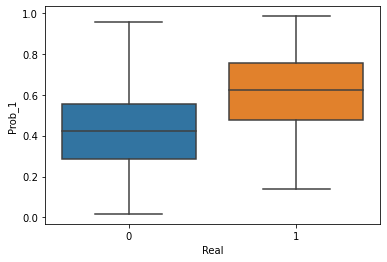

In [66]:
# Avaliando graficamente as probabilidades previstas como passíveis de abandono.
box_prob = sns.boxplot(x=resultados_teste.Real, y=resultados_teste.Prob_1)

In [67]:
prob_abandono = resultados_teste.Prob_1.sort_values(ignore_index=True)
prob_abandono

0       0.017482
1       0.019213
2       0.026521
3       0.027583
4       0.028149
          ...   
1662    0.945885
1663    0.946257
1664    0.953608
1665    0.970842
1666    0.983106
Name: Prob_1, Length: 1667, dtype: float64

<AxesSubplot:xlabel='Prob_1', ylabel='Count'>

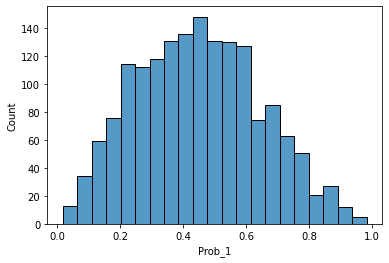

In [68]:
# Histograma da probabilidade dos clientes classificados como passíveis de abandonar a operadora
sns.histplot(prob_abandono)

Com estas informações, a operadora pode escalonar ações para aumento da satisfação e, consequentemente, da retenção dos clientes, reduzindo o seu *custo de retenção*.

### Conclusão
Neste trabalho criou-se um modelo de previsão de *churn* dos clientes de uma operadora de telefonia, com atribuição da probabilidade de isto acontecer. Para isto, foram utilizados modelos de regressão logística, tal como proposto no problema, variando-se apenas os dados de entrada dos modelos. Chegou-se à conclusão que o melhor desempenho deu-se com todos os atributos de entrada, porém com um *dataset* balanceado utilizando-se a técnica de SMOTE. Concluiu-se também que para o problema em tela, há um *tradeoff* entre acurácia e *recall*, de modo que a métrica *f1-score* representa um melhor indicador da qualidade do modelo.

#### Melhorias futuras
Como melhorias futuras deste trabalho, pode-se criar modelos utilizando diferentes algoritmos de classificação, como por exemplo, Naive-Bayes, Random Forest, SVM, entre outros.